In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
df = pd.read_csv("all_sales_boston_with_macro.csv")

In [28]:
df.columns

Index(['unit', 'street_name', 'sale_date', 'parcel', 'category', 'sale_price',
       'street_no', 'price_per_sf', 'living_area', 'total_room_num',
       'bedrooms', 'bathrooms', 'half_bathrooms', 'kitchens', 'fireplaces',
       'ac_type', 'heat_type', 'interior_condition', 'parking_spots',
       'year_built', 'exterior_condition', 'foundation', 'full_address',
       'owner_name', 'owner_property_count', 'x', 'y', 'properties', 'year',
       'modified_z', 'NEAR_FID', 'NEAR_DIST_Parks', 'NEAR_DIST_Health',
       'NEAR_FC', 'NEAR_DIST_Safety', 'NEAR_DIST_University',
       'NEAR_DIST_Security', 'NEAR_DIST_Subway', 'NEAR_DIST_Culture',
       'NEAR_DIST_Culture_District', 'NEAR_COUNT_Schools', 'NEAR_COUNT_Bus',
       'NEAR_COUNT_Trees', 'NEAR_COUNT_Restaurants', 'quarter', 'GDP',
       'GDP_YoY', 'month', 'CPI', 'CPI_YoY'],
      dtype='object')

In [29]:
df['month'] = pd.to_datetime(df['month'])

In [30]:
df['month']

0       2019-06-01
1       2019-06-01
2       2019-03-01
3       2019-06-01
4       2019-06-01
           ...    
29608   2023-11-01
29609   2023-09-01
29610   2023-04-01
29611   2023-03-01
29612   2023-12-01
Name: month, Length: 29613, dtype: datetime64[ns]

In [31]:
cpi_base = df[df['month'].dt.year == 2023]['CPI'].mean()

# Step 2: Adjust sale_price to 2023 dollars
df['sale_price_real_2023'] = df['sale_price'] * (cpi_base / df['CPI'])

# Step 3: Round for clarity
df['sale_price_real_2023'] = df['sale_price_real_2023'].round(2)

In [32]:
# do the same for price_per_sf
df['price_per_sf_real_2023'] = df['price_per_sf'] * (cpi_base / df['CPI'])
df['price_per_sf_real_2023'] = df['price_per_sf_real_2023'].round(2)


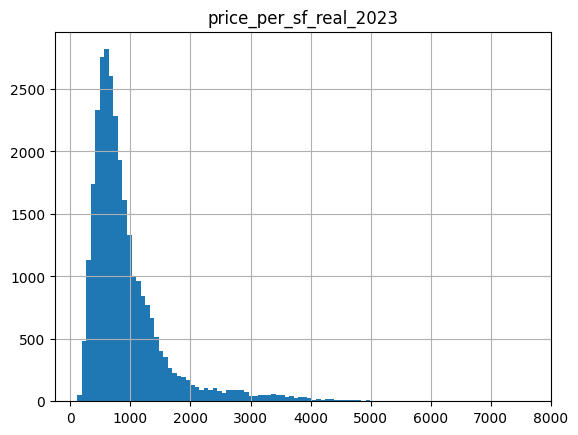

In [33]:
df['price_per_sf_real_2023'].describe()

import matplotlib.pyplot as plt
df['price_per_sf_real_2023'].hist(bins=100)
plt.title("price_per_sf_real_2023")
plt.show()

In [34]:
cutoff = df['price_per_sf_real_2023'].quantile(0.01)  # 1st percentile
df_filtered = df[df['price_per_sf_real_2023'] >= cutoff]

297


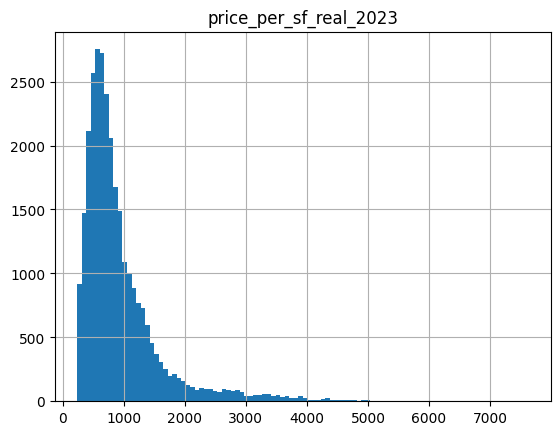

In [35]:
print(len(df) - len(df_filtered))

# now we can plot the price per sf of the filtered data
df_filtered['price_per_sf_real_2023'].hist(bins=100)
plt.title("price_per_sf_real_2023")
plt.show()

# now we can plot the price per sf of the filtered data


In [36]:
# save the filtered data
df_filtered.to_csv('all_sales_boston_with_macro_filtered.csv', index=False)

Text(0.5, 1.0, 'Correlation Matrix')

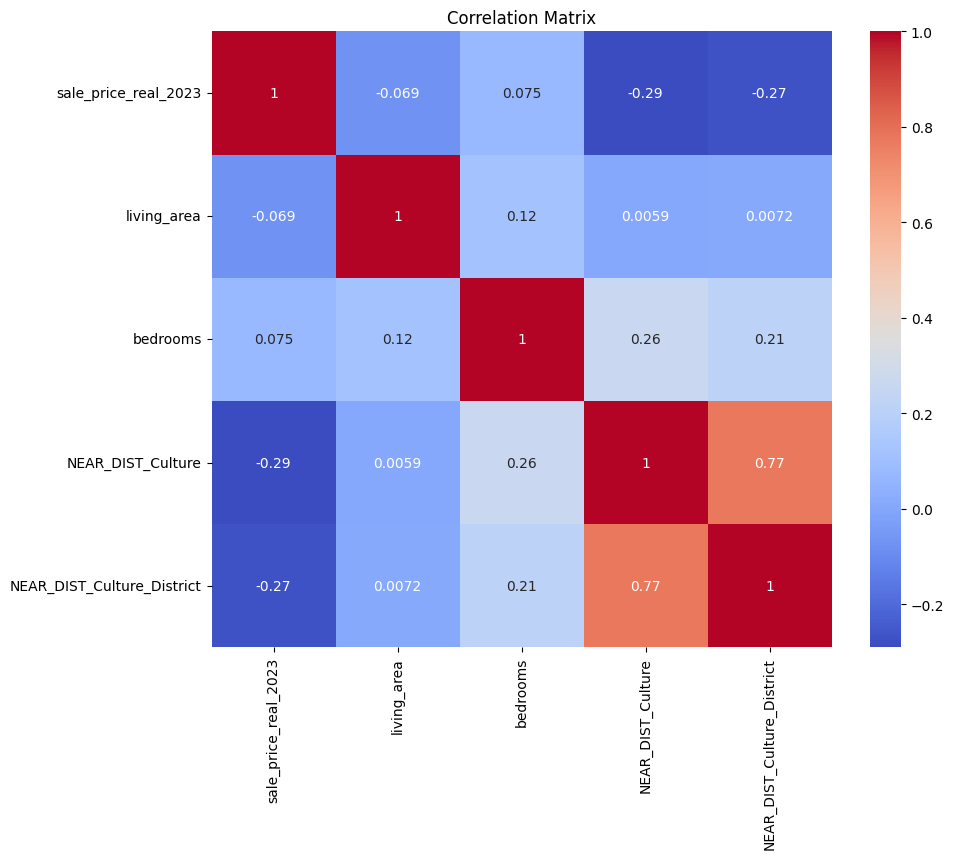

In [38]:
import seaborn as sns
# draw a correlation matrix of the filtered data
columns = [ "sale_price_real_2023",\
            "living_area",\
            "bedrooms",\
            # "GDP_YoY",\
            # "CPI_YoY",\
            # "x",\
            # "y",\
            # "NEAR_DIST_Parks",\
            # "NEAR_DIST_Health",\
            # "NEAR_DIST_Safety",\
            # "NEAR_DIST_University",\
            # "NEAR_DIST_Security",\
            # "NEAR_DIST_Subway",\
            # "NEAR_COUNT_Schools",\
            # "NEAR_COUNT_Bus",\
            # "NEAR_COUNT_Trees",\
            "NEAR_DIST_Culture",\
            "NEAR_DIST_Culture_District"]

# now draw a correlation matrix of the filtered data
df_filtered[columns].corr()

# now draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")